In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)

Sample labels (y_train): [5 0 4 1 9 2 1 3 1 4]

Head (first 5 labels):
   Label
0      5
1      0
2      4
3      1
4      9

Describe (label distribution in first 20 samples):
           Label
count  20.000000
mean    4.000000
std     2.790963
min     0.000000
25%     1.750000
50%     3.500000
75%     6.000000
max     9.000000


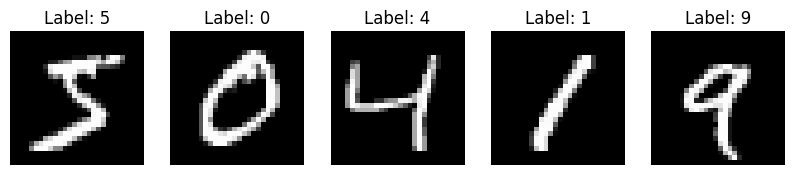


After one-hot encoding:
y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

print("\nSample labels (y_train):", y_train[:10])

df = pd.DataFrame({"Label": y_train[:20]})
print("\nHead (first 5 labels):")
print(df.head())

print("\nDescribe (label distribution in first 20 samples):")
print(df.describe())

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("\nAfter one-hot encoding:")
print("y_train[0]:", y_train[0])


In [21]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


In [24]:
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10,
                    batch_size=128,
                    verbose=2)



Epoch 1/10
469/469 - 3s - 7ms/step - accuracy: 0.9070 - loss: 0.3296 - val_accuracy: 0.9485 - val_loss: 0.1675
Epoch 2/10
469/469 - 3s - 6ms/step - accuracy: 0.9585 - loss: 0.1386 - val_accuracy: 0.9629 - val_loss: 0.1258
Epoch 3/10
469/469 - 3s - 5ms/step - accuracy: 0.9709 - loss: 0.0961 - val_accuracy: 0.9699 - val_loss: 0.0962
Epoch 4/10
469/469 - 4s - 9ms/step - accuracy: 0.9778 - loss: 0.0722 - val_accuracy: 0.9738 - val_loss: 0.0846
Epoch 5/10
469/469 - 4s - 9ms/step - accuracy: 0.9826 - loss: 0.0563 - val_accuracy: 0.9751 - val_loss: 0.0794
Epoch 6/10
469/469 - 2s - 5ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0.9760 - val_loss: 0.0807
Epoch 7/10
469/469 - 2s - 5ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9736 - val_loss: 0.0902
Epoch 8/10
469/469 - 3s - 6ms/step - accuracy: 0.9899 - loss: 0.0307 - val_accuracy: 0.9783 - val_loss: 0.0771
Epoch 9/10
469/469 - 5s - 10ms/step - accuracy: 0.9927 - loss: 0.0244 - val_accuracy: 0.9778 - val_loss: 0.0766


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f":Accuracy: {test_acc:.4f}")


✅ Test Accuracy: 0.9796


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


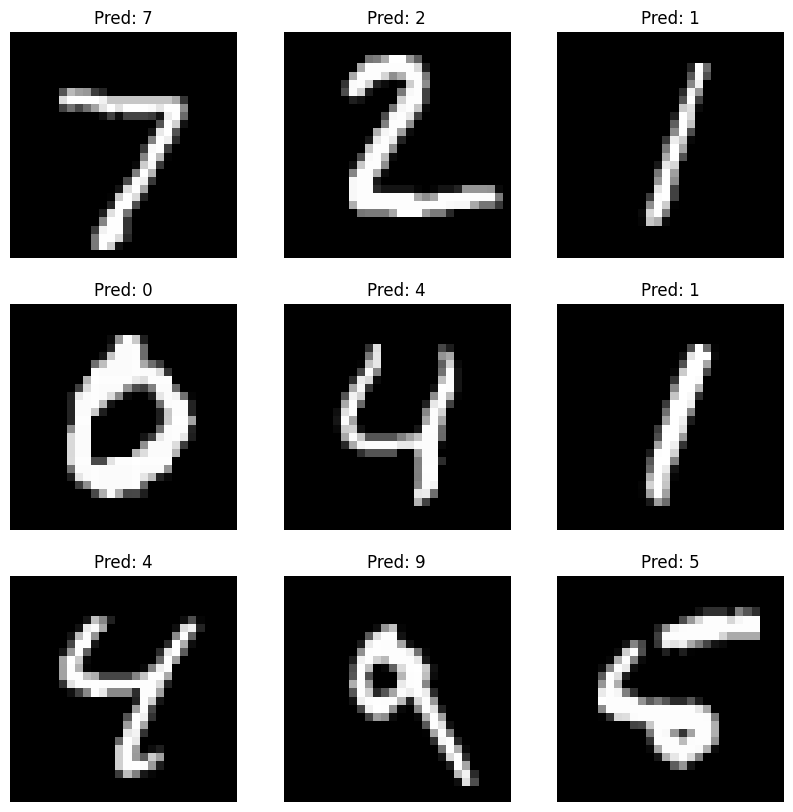

In [26]:
predictions = model.predict(x_test[:9])

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()